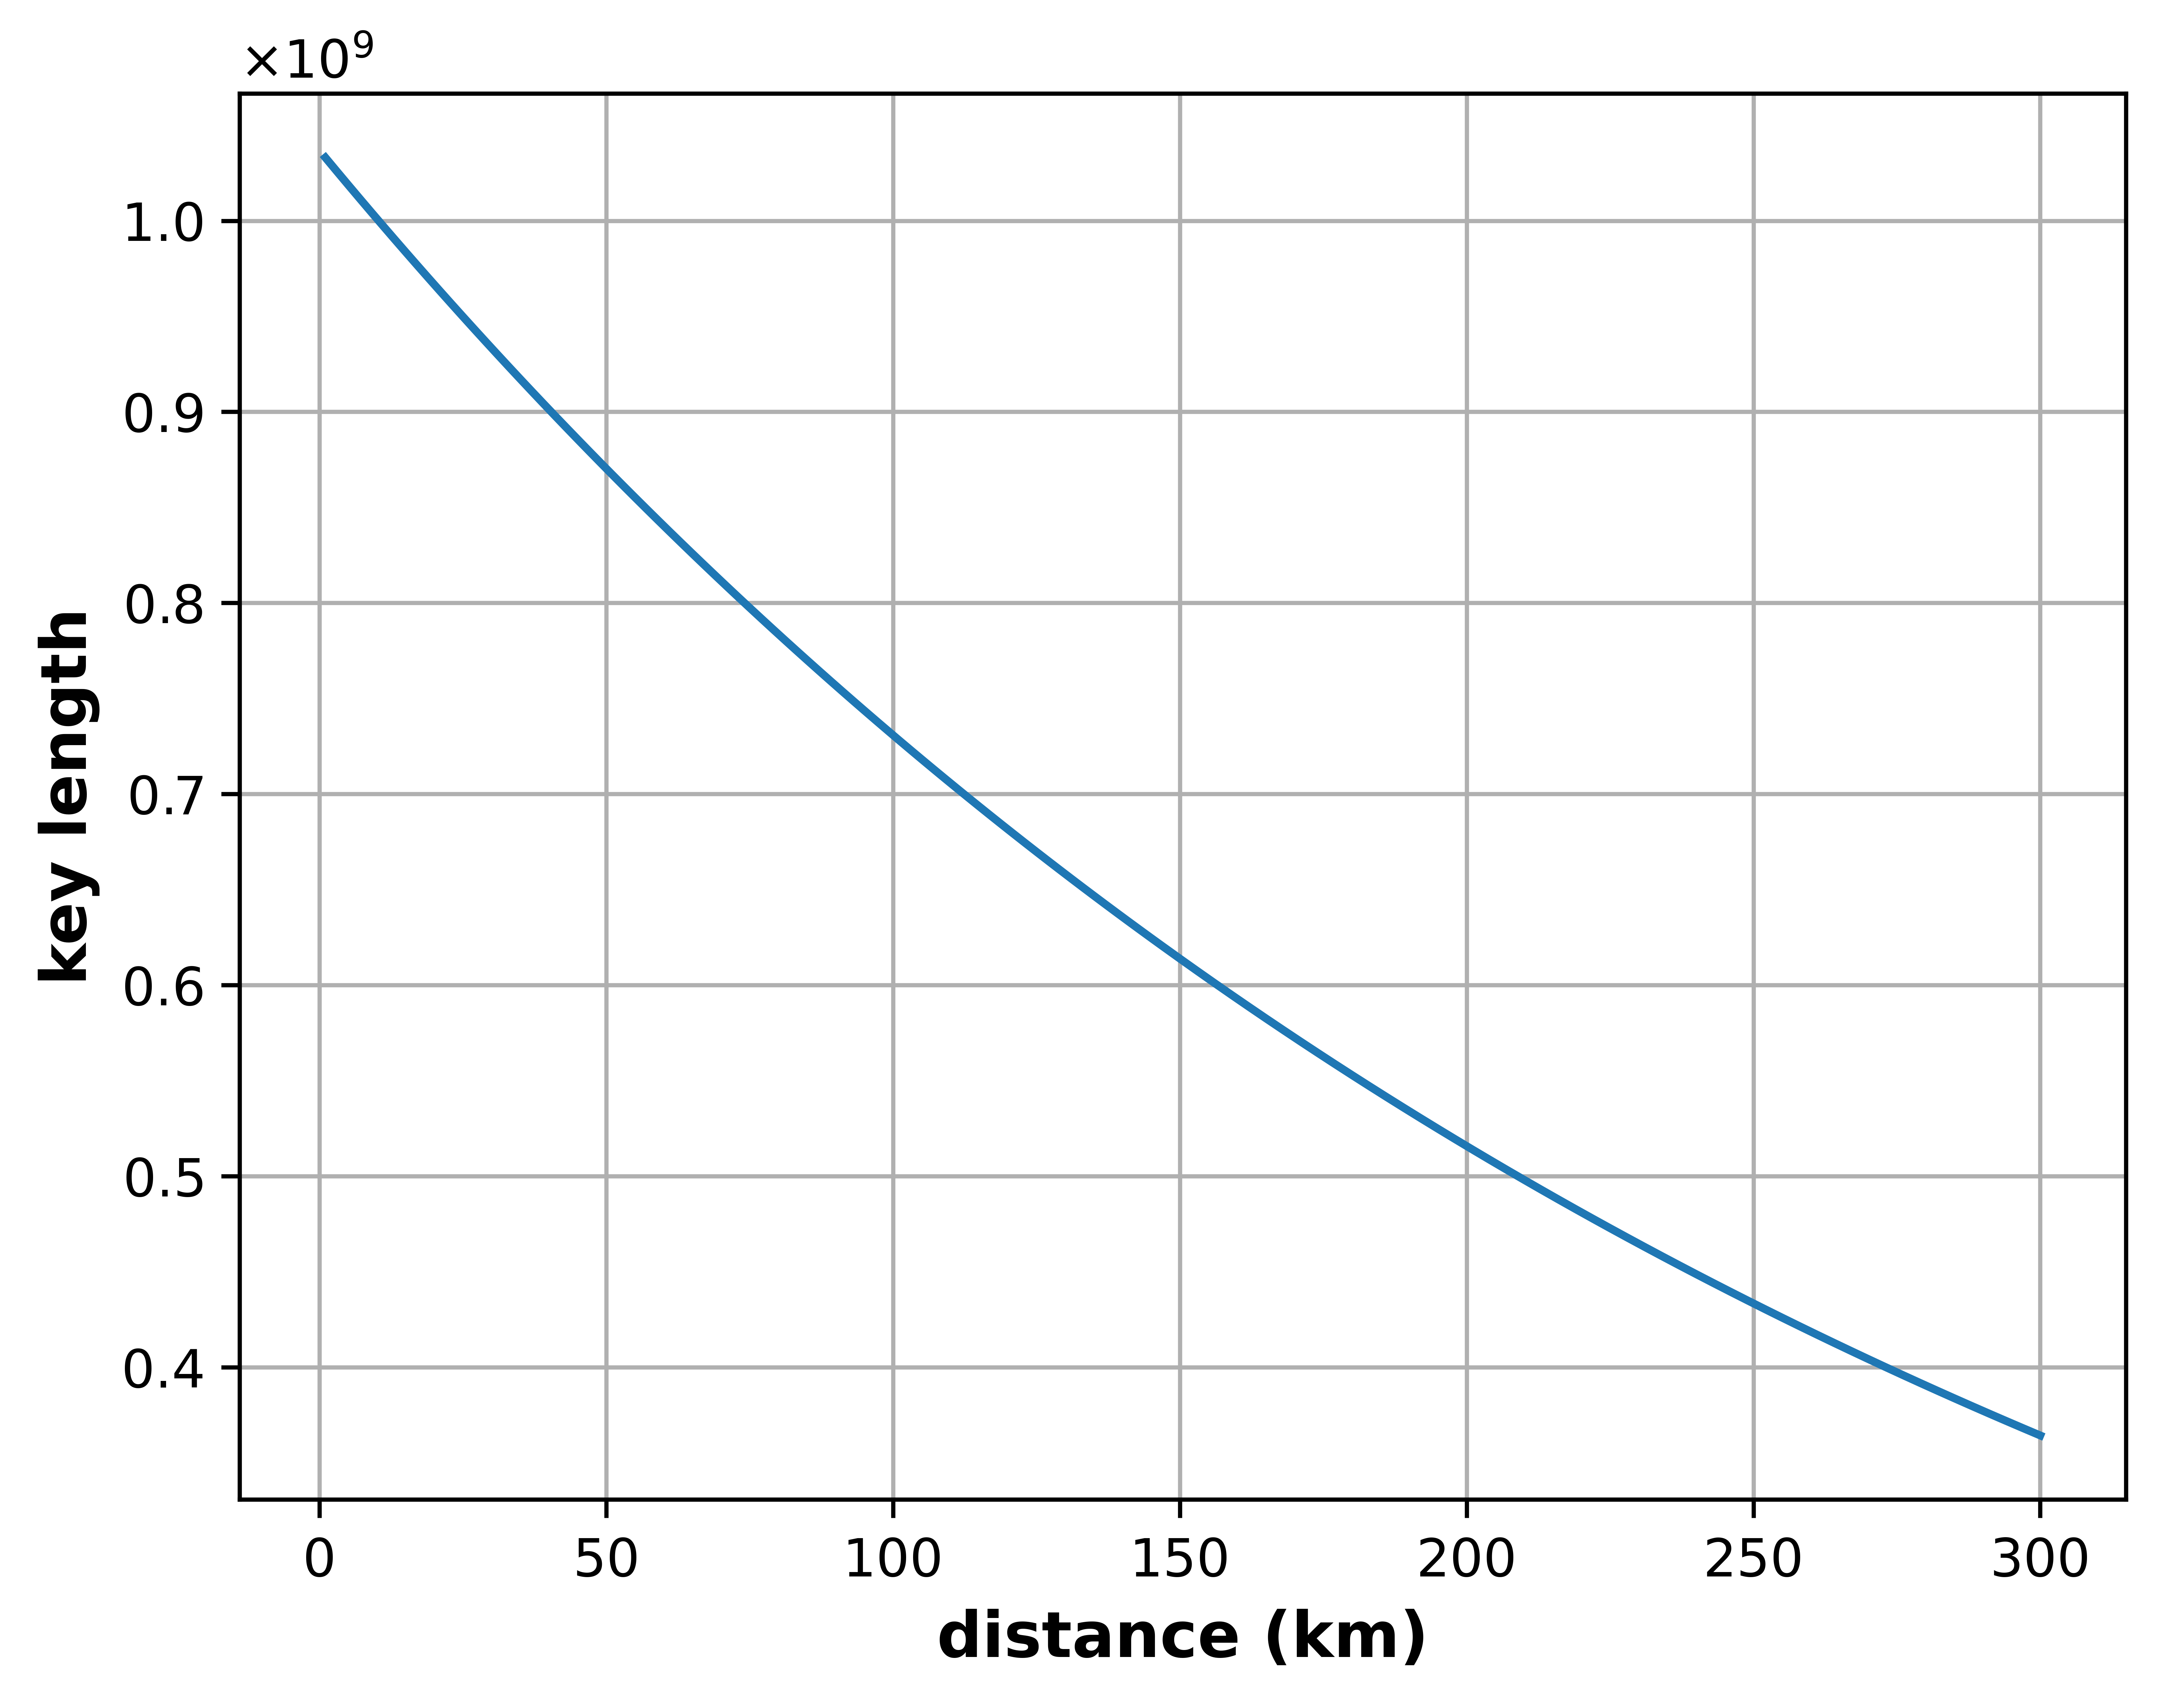

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import integrate
0
c = np.linspace(1,300,300)
#x = 0.5 * (10**((-0.3) / (20 * c)))
N = (10**(10))
D = 16
pz = 0.1
pz0 = 0.75
p0 = 0.5
p1 = 0.3
em = 0.03
pd = 10**(-7)
a1 = 0.15
a2 = 0.1
az = ((a1 + a2) / 2)
the = np.linspace(0.01,np.pi,100)
eps = 10**(-12)
P0a1 = ((1 - pz) * p0 * (1 - pz) * p1) * np.exp(-((1 - pz) * p0) - ((1 - pz) * p1))
P0a2 = ((1 - pz) * p0 * (1 - pz) * (1 - p0 - p1)) * np.exp(-((1 - pz) * p0) - ((1 - pz) * (1 - p0 - p1)))
Pa1 = ((1 - pz) * p1 * (1 - pz) * p1) * np.exp(-((1 - pz) * p1) - ((1 - pz) * p1))
Pa2 = ((1 - pz) * (1 - p0 - p1) * (1 - pz) * (1 - p0 - p1)) * np.exp(-((1 - pz) * (1 - p0 - p1)) - ((1 - pz) * (1 - p0 - p1)))
tau = (P0a1 + P0a2 + Pa1 + Pa2)
keys = []

N0 = ((((1 - pz)**2) * (p0**2)) + (2 * (1-pz) * pz * p0 * pz0)) * N
N1 = ((((1 - pz)**2) * p0 * p1) + ((1-pz) * pz * pz0 * p1)) * N
N2 = ((((1 - pz)**2) * (1 - p0 - p1) * p0) + ((1-pz) * pz * pz0 * (1 - p0 - p1))) * N

ND = ((D / (2 * np.pi)) * ((1 - pz)**2) * (p1**2)) * N

for x in c:
	eta = 0.5 * (10**((-0.3 * x) / (200)))
	n11 = 2 * (((1 - pd) * (np.exp((eta * a1) / (2)))) - (((1 - pd)**2) * (np.exp(-eta * a1)))) * N1 
	n22 = 2 * (((1 - pd) * (np.exp((eta * a2) / (2)))) - (((1 - pd)**2) * (np.exp(-eta * a2)))) * N2
	Ta1 = (sp.integrate.quad(lambda the: (((1 - pd) / D) * np.exp(-2 * eta * a1 * np.cos(the/2)**2)), -D/2, D/2))
	Ta11 = Ta1[0] - ((1 - pd)**2 * np.exp(-2 * eta * a1))
	Sa1 = (sp.integrate.quad(lambda the: (((1 - pd) / D) * np.exp(-2 * eta * a1 * np.sin(the/2)**2)), -D/2, D/2))
	Sa11 = Sa1[0] - ((1 - pd)**2 * np.exp(-2 * eta * a1)) + Ta11
	Ta2 = (sp.integrate.quad(lambda the: (((1 - pd) / D) * np.exp(-2 * eta * a2 * np.cos(the/2)**2)), -D/2, D/2))
	Ta22 = Ta2[0] - ((1 - pd)**2 * np.exp(-2 * eta * a2))
	Sa2 = (sp.integrate.quad(lambda the: (((1 - pd) / D) * np.exp(-2 * eta * a2 * np.sin(the/2)**2)), -D/2, D/2))
	Sa22 = Sa2[0] - ((1 - pd)**2 * np.exp(-2 * eta * a2)) + Ta22
	n00 = (2 * pd * (1 - pd)) * N0
	n01 = n11 + (np.sqrt((n11 * (np.log(eps**(-1)))) / (2)))
	n02 = n22 - (np.sqrt((n22 * (np.log(eps**(-1)))) / (2)))
	na1 = ((Ta11* (1 - (2 * em))) + (em * Sa11)) * ND
	na2 = ((Ta22* (1 - (2 * em))) + (em * Sa22)) * ND
	nf1 = ((np.exp(-a1**2) * a1 * (2 * n01)) / (P0a1))
	nf2 = ((np.exp(-a2**2) * a2 * (2 * n02)) / (P0a2))
	nf3 = (np.exp(-a1**2) * a1 * (2 * n00))
	ef1 = ((np.exp(-a1**2) * (a1**2) * (na1)) / (Pa1))
	ef2 = ((np.exp(-a2**2) * (a2**2) * (na2)) / (Pa2))
	ef3 = ((np.exp(-a1**2) * np.exp(-a2**2) * (a1**2) * (a2**2) * (2 * n01)) / (P0a1))
	length = ((tau * (nf1 - nf2 - nf3)) / (2 * (a1 - a2)))
	error = (((tau) * (ef1 - ef2 + ef3)) / ((a1 - a2) * length))
	he = -((error * np.log2(error)) + ((1-error) * np.log2(1-error)))
	key = length * (1 - he)
	final = np.vectorize(key)
#	print(key)
	keys.append(key)	

plt.figure(dpi=1200)
plt.plot(c,keys)
plt.xlabel(r'distance (km)', fontsize=12, fontweight='bold')
plt.ylabel(r'key length', fontsize=12, fontweight='bold')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
#plt.yscale('log')
plt.grid()

plt.xlim()
plt.ylim()
#plt.legend()

plt.savefig("tfqds.png", dpi = 1000)
plt.savefig("Figure4.pdf", bbox_inches='tight')